# Import Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

## Euclidean distance $ d(x, y) = \sqrt{\sum_{i=1}^n{(y_{i} - x_{i})^2}}$

# Read Data

In [3]:
iris = pd.read_csv('Dataset/iris.csv')

In [4]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
np.unique(iris['Species'].values)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Data Visulization

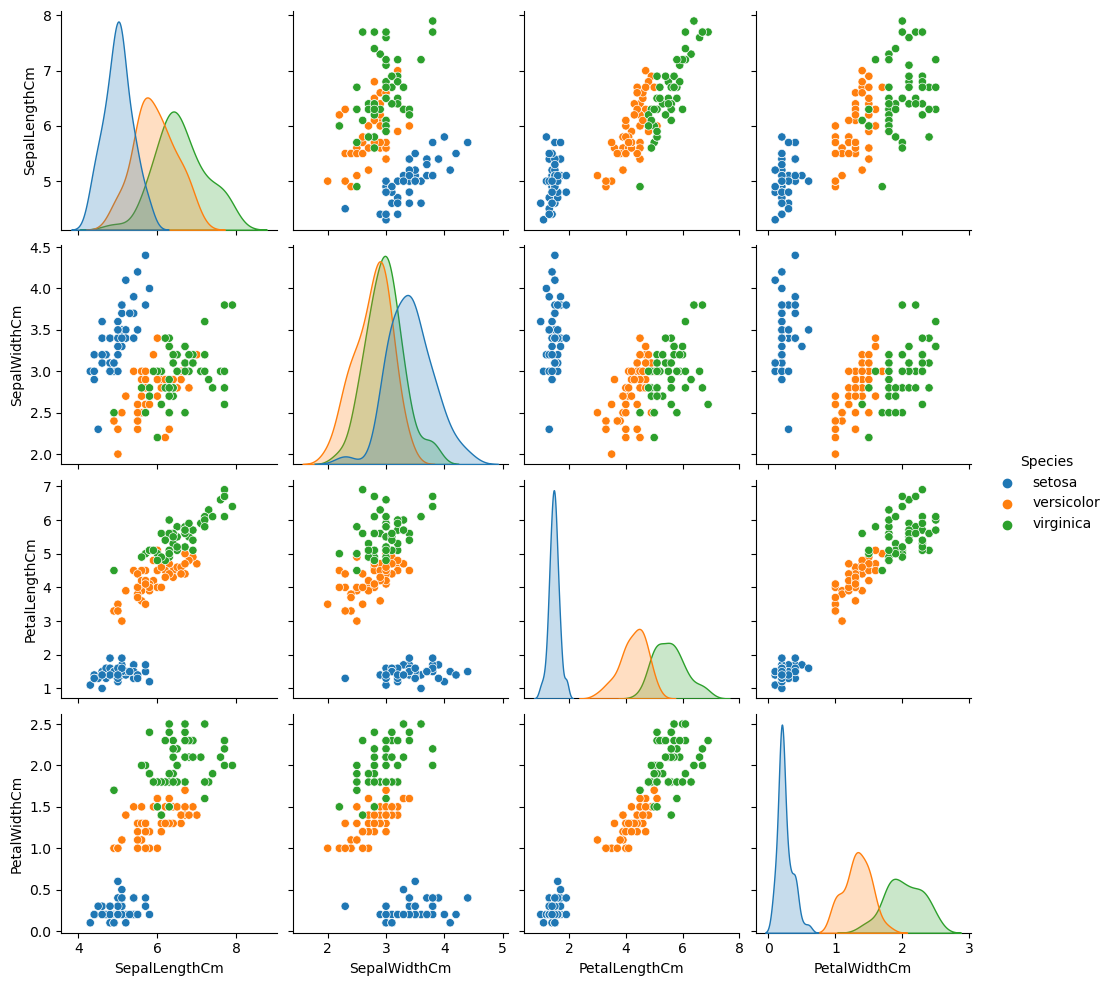

In [7]:
sns.pairplot(iris, hue='Species')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

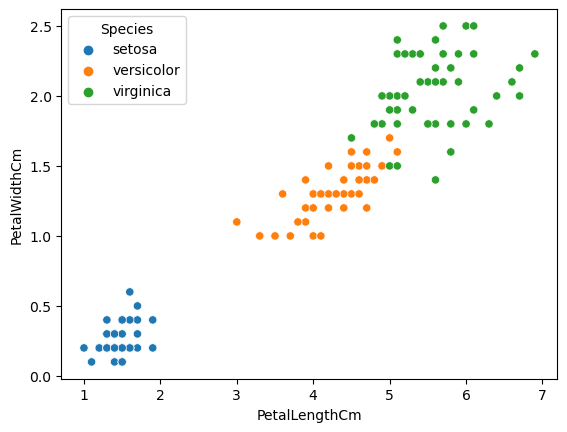

In [8]:
sns.scatterplot(x=iris['PetalLengthCm'], y=iris['PetalWidthCm'], hue=iris['Species'])

# Split Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.iloc[:,-1], test_size=0.4, random_state=42)

# Data Standardization

In [10]:
scaler = StandardScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
X_test_scaled = scaler.transform(X_test)

# Creating Model

In [13]:
knn_clf = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
predictions = knn_clf.predict(X_test_scaled)

In [16]:
print(confusion_matrix(y_test, predictions))

[[23  0  0]
 [ 0 18  1]
 [ 0  1 17]]


In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.95      0.95      0.95        19
   virginica       0.94      0.94      0.94        18

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



# Choosing Right K Value

In [18]:
error_rate = []

for i in range(1, 40):
    
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(X_train_scaled, y_train)
    pred_i = knn_clf.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

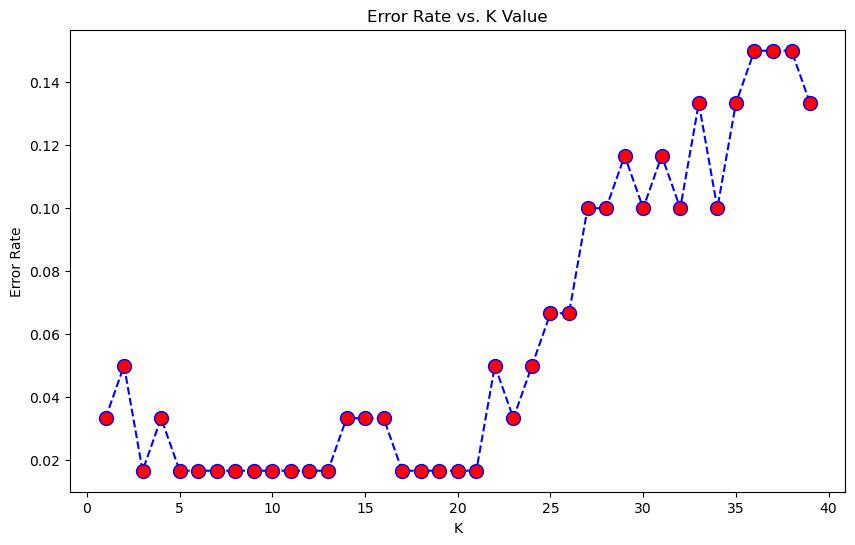

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Creating Model With The Right K Value

In [20]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [21]:
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
predictions = knn_clf.predict(X_test_scaled)

In [23]:
print(confusion_matrix(y_test, predictions))

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

